<a href="https://colab.research.google.com/github/diablaxus/Proyecto_Cafe/blob/main/Clasificacion_Cafe.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **DataSet: **
https://drive.google.com/file/d/1TJ6Kb0MlA_8zyXu7pBrE63DVPu-HHrHr/view?usp=sharing

Saving merged_data_cleaned.csv to merged_data_cleaned.csv
   Unnamed: 0  Species                     Owner Country.of.Origin  \
0           0  Arabica                 metad plc          Ethiopia   
1           1  Arabica                 metad plc          Ethiopia   
2           2  Arabica  grounds for health admin         Guatemala   
3           3  Arabica       yidnekachew dabessa          Ethiopia   
4           4  Arabica                 metad plc          Ethiopia   

                                  Farm.Name Lot.Number       Mill ICO.Number  \
0                                 metad plc        NaN  metad plc  2014/2015   
1                                 metad plc        NaN  metad plc  2014/2015   
2  san marcos barrancas "san cristobal cuch        NaN        NaN        NaN   
3     yidnekachew dabessa coffee plantation        NaN    wolensu        NaN   
4                                 metad plc        NaN  metad plc  2014/2015   

                                 Company

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


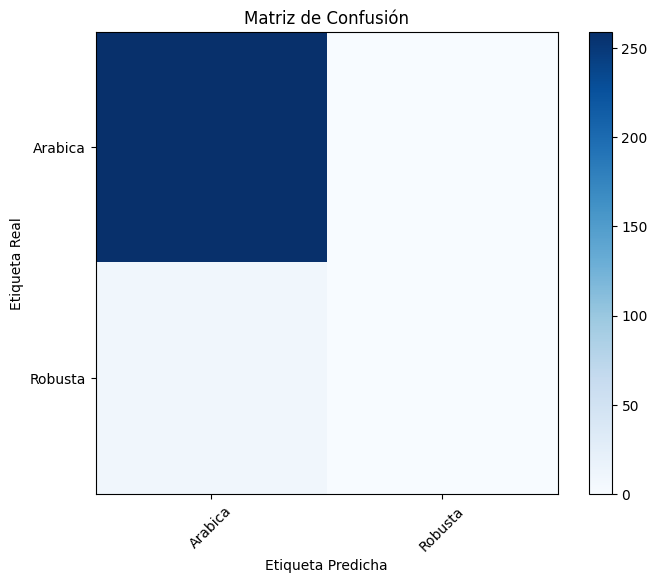

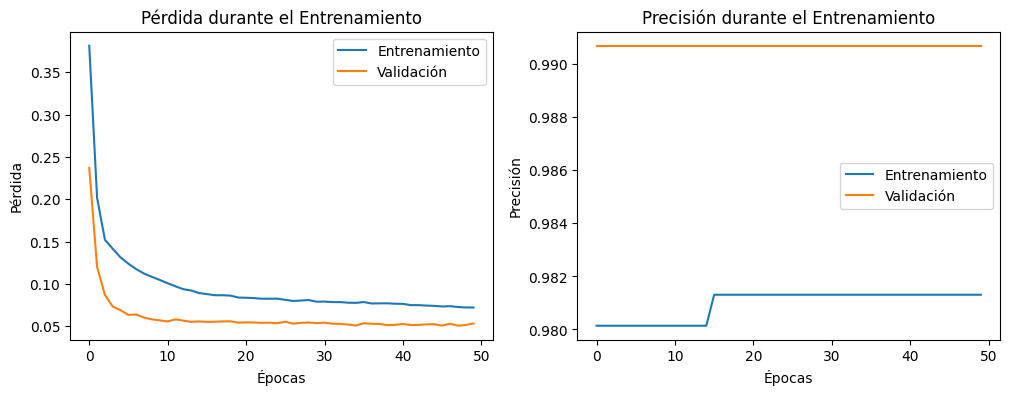

In [ ]:
# Importar librerías necesarias
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report, confusion_matrix
import matplotlib.pyplot as plt
import tensorflow as tf

# =====================================
# 1. Cargar el Dataset
# =====================================
# Cargar el archivo desde tu máquina
from google.colab import files
uploaded = files.upload()

# Leer el archivo combinado (merged_data_cleaned.csv)
data = pd.read_csv('merged_data_cleaned.csv')

# Mostrar las primeras filas para explorar los datos
print(data.head())
print("\nColumnas del dataset:", data.columns)

# =====================================
# 2. Procesamiento de Datos
# =====================================
# Selección de características y etiquetas
# Aquí asumimos que las características relevantes ya están en columnas numéricas.
X = data[['Aroma', 'Flavor', 'Aftertaste', 'Acidity', 'Body', 'Balance']]  # Ajusta según las columnas disponibles
y = pd.get_dummies(data['Species'])  # Codifica las etiquetas (e.g., Arabica, Robusta)

# Escalar las características
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Dividir los datos en entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

# =====================================
# 3. Construcción del Modelo MLP
# =====================================
# Crear el modelo
model = tf.keras.Sequential([
    tf.keras.layers.Dense(64, activation='relu', input_shape=(X_train.shape[1],)),
    tf.keras.layers.Dense(32, activation='relu'),
    tf.keras.layers.Dense(y_train.shape[1], activation='softmax')  # Salida para clasificación multiclase
])

# Compilar el modelo
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Resumen del modelo
model.summary()

# =====================================
# 4. Entrenamiento del Modelo
# =====================================
# Entrenar el modelo
history = model.fit(X_train, y_train, validation_split=0.2, epochs=50, batch_size=32)

# =====================================
# 5. Evaluación del Modelo
# =====================================
# Evaluar el modelo en el conjunto de prueba
test_loss, test_acc = model.evaluate(X_test, y_test)
print(f"\nPrecisión en el conjunto de prueba: {test_acc:.2f}")

# Predicciones
y_pred = model.predict(X_test)
y_pred_classes = np.argmax(y_pred, axis=1)
y_true = np.argmax(y_test.values, axis=1)

# Reporte de clasificación
print("\nReporte de Clasificación:")
print(classification_report(y_true, y_pred_classes, target_names=y.columns))

# Matriz de Confusión
cm = confusion_matrix(y_true, y_pred_classes)
plt.figure(figsize=(8, 6))
plt.imshow(cm, interpolation='nearest', cmap=plt.cm.Blues)
plt.title("Matriz de Confusión")
plt.colorbar()
plt.xticks(range(len(y.columns)), y.columns, rotation=45)
plt.yticks(range(len(y.columns)), y.columns)
plt.ylabel("Etiqueta Real")
plt.xlabel("Etiqueta Predicha")
plt.show()

# =====================================
# 6. Visualización del Entrenamiento
# =====================================
# Graficar pérdida y precisión
plt.figure(figsize=(12, 4))

# Pérdida
plt.subplot(1, 2, 1)
plt.plot(history.history['loss'], label='Entrenamiento')
plt.plot(history.history['val_loss'], label='Validación')
plt.title("Pérdida durante el Entrenamiento")
plt.xlabel("Épocas")
plt.ylabel("Pérdida")
plt.legend()

# Precisión
plt.subplot(1, 2, 2)
plt.plot(history.history['accuracy'], label='Entrenamiento')
plt.plot(history.history['val_accuracy'], label='Validación')
plt.title("Precisión durante el Entrenamiento")
plt.xlabel("Épocas")
plt.ylabel("Precisión")
plt.legend()

plt.show()